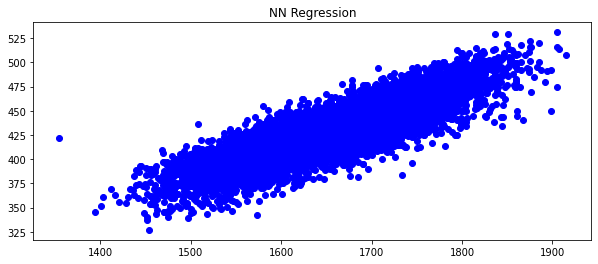

TypeError: 'numpy.int64' object is not callable

In [11]:
'''
@Brief  User body size estimator(regressor) with Neural Network
@author Byunghun Hwang<bh.hwang@iae.re.kr>
@Date   2020.12.21
'''
import pandas as pd
import torch
# from torch.autograd import Variable
# import torch.nn.functional as F
import torch.utils.data as Data

import matplotlib.pyplot as plt
import numpy as np

raw_dataset = pd.read_csv('./data_size/raw_size.csv', header=0, index_col=False)
dataset = raw_dataset[["gender", "age", "N3", "N31", "N16"]] # N3:height, N31:weight, N16:Knee Height

x = dataset[["N3"]]
y = dataset[["N16"]]

plt.figure(figsize=(10,4))
plt.scatter(x, y, color="blue")
plt.title("NN Regression")
plt.show()

net = torch.nn.Sequential(
    torch.nn.Linear(1, 200),
    torch.nn.LeakyReLU(),
    torch.nn.Linear(200, 100),
    torch.nn.LeakyReLU(),
    torch.nn.LeakyReLU(100, 1),
)

optimizer = torch.optim.Adam(net.parameters(), lr=0.01)
loss_function = torch.nn.MSELoss()

torch_dataset = Data.TensorDataset(x,y)
loader = Data.DataLoader(
    dataset=torch_dataset, 
    batch_size=BATCH_SIZE, 
    shuffle=True, num_workers=2,)

my_images = []
fig, ax = plt.subplots(figsize=(16,10))

# start training
for epoch in range(EPOCH):
    for step, (batch_x, batch_y) in enumerate(loader): # for each training step
        
        b_x = Variable(batch_x)
        b_y = Variable(batch_y)

        prediction = net(b_x)     # input x and predict based on x

        loss = loss_func(prediction, b_y)     # must be (1. nn output, 2. target)

        optimizer.zero_grad()   # clear gradients for next train
        loss.backward()         # backpropagation, compute gradients
        optimizer.step()        # apply gradients

        if step == 1:
            # plot and show learning process
            plt.cla()
            ax.set_title('Regression Analysis - model 3 Batches', fontsize=35)
            ax.set_xlabel('Independent variable', fontsize=24)
            ax.set_ylabel('Dependent variable', fontsize=24)
            ax.set_xlim(-11.0, 13.0)
            ax.set_ylim(-1.1, 1.2)
            ax.scatter(b_x.data.numpy(), b_y.data.numpy(), color = "blue", alpha=0.2)
            ax.scatter(b_x.data.numpy(), prediction.data.numpy(), color='green', alpha=0.5)
            ax.text(8.8, -0.8, 'Epoch = %d' % epoch,
                    fontdict={'size': 24, 'color':  'red'})
            ax.text(8.8, -0.95, 'Loss = %.4f' % loss.data.numpy(),
                    fontdict={'size': 24, 'color':  'red'})

            # Used to return the plot as an image array 
            # (https://ndres.me/post/matplotlib-animated-gifs-easily/)
            fig.canvas.draw()       # draw the canvas, cache the renderer
            image = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
            image  = image.reshape(fig.canvas.get_width_height()[::-1] + (3,))

            my_images.append(image)

    


# save images as a gif    
imageio.mimsave('./curve_2_model_3_batch.gif', my_images, fps=12)


fig, ax = plt.subplots(figsize=(16,10))
plt.cla()
ax.set_title('Regression Analysis - model 3, Batches', fontsize=35)
ax.set_xlabel('Independent variable', fontsize=24)
ax.set_ylabel('Dependent variable', fontsize=24)
ax.set_xlim(-11.0, 13.0)
ax.set_ylim(-1.1, 1.2)
ax.scatter(x.data.numpy(), y.data.numpy(), color = "blue", alpha=0.2)
prediction = net(x)     # input x and predict based on x
ax.scatter(x.data.numpy(), prediction.data.numpy(), color='green', alpha=0.5)
plt.savefig('curve_2_model_3_batches.png')
plt.show()


# class Net(torch.nn.Module):
#     def __init__(self, n_features, n_hidden, n_output):
#         super(Net, self).__init__()
#         self.hidden = torch.nn.Linear(n_features, n_hidden)
#         self.predict = torch.nn.Linear(n_hidden, n_output)


#     def forward(self, x):
#         x = F.relu(self.hidden(x))
#         x = self.predict(x)
#         return x


